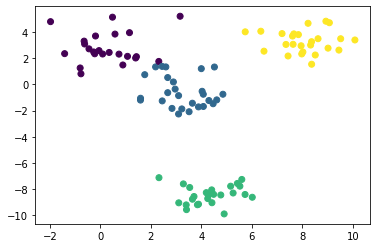

In [51]:

import matplotlib.pyplot as plt
import numpy as np
import copy
from sklearn.datasets import make_blobs

count_of_clusters = 4
count_of_dots = 100
cluster_dispersion = np.zeros(count_of_dots)
dots, y = make_blobs(count_of_dots,2,count_of_clusters,1)

def k_means(count_of_clusters, dots, count_of_dots):
    start_centres = np.zeros((count_of_clusters, 2))
    while count_of_clusters != len(np.unique(start_centres[:, 0])) :
        for i in range(count_of_clusters):
            j = np.random.randint(count_of_dots)
            start_centres[i, :] = np.copy(dots[j - 1, :])   
    while 1:
        new_dots = np.zeros((count_of_clusters, 2))
        while ((start_centres != new_dots).any()):
            new_dots = copy.deepcopy((start_centres))
            cluster_dispersion = np.zeros((count_of_dots))
            distance = np.zeros((count_of_clusters))
            for j in range (count_of_dots): 
                for i in range(count_of_clusters):
                    distance[i] = np.sum((start_centres[i, :] - dots[j, :]) ** 2)
                founded_cluster = np.argmin(distance)
                cluster_dispersion[j] = founded_cluster;
        start_centres_old = np.zeros((count_of_clusters, 2))
        start_centres_old = copy.deepcopy(start_centres)    
        for i in range(count_of_clusters):
            count = 0;
            dots_sum = np.zeros((2))
            for j in range(count_of_dots):
                if cluster_dispersion[j] == i :
                    count += 1;
                    dots_sum += dots[j, :]
            if count != 0 :
                start_centres[i, :] = dots_sum / count
        if (start_centres_old == start_centres).all():
             break
    return cluster_dispersion

cluster_dispersion = k_means(count_of_clusters, dots, count_of_dots)
plt.scatter(dots[:, 0], dots[:, 1], c = cluster_dispersion)
plt.savefig('picture1.jpg')